ejercicio 1

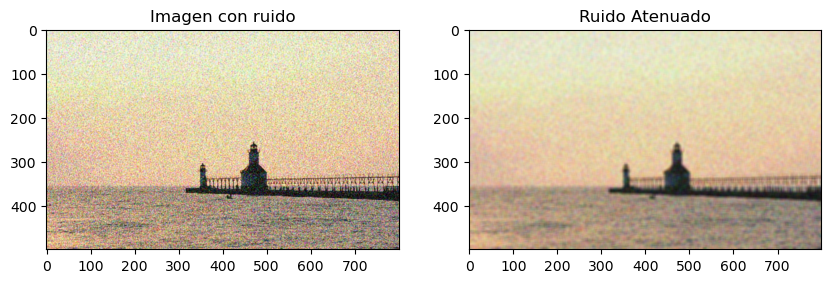

In [9]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

imgRuido=cv2.imread('imgParcial/ruido.jpg')
imgRuido=cv2.cvtColor(imgRuido,cv2.COLOR_BGR2RGB)
kernel=np.ones((8,8),np.float32)/64
suavizado=cv2.filter2D(imgRuido,-1,kernel)

plt.figure(figsize=(10, 5))
plt.subplot(121)

plt.imshow(imgRuido)
plt.title('Imagen con ruido')

plt.subplot(122)
plt.imshow(suavizado)
plt.title('Ruido Atenuado')

plt.show()


ejercicio 2

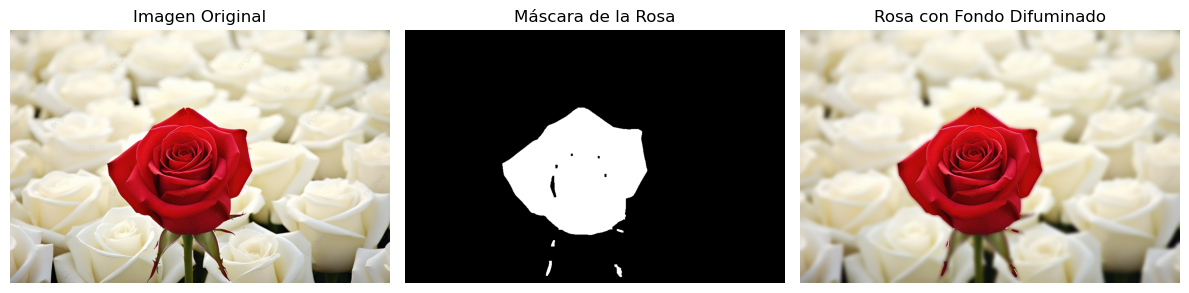

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detectRosa(dirImg):
    img = cv2.imread(dirImg)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    r1 = np.array([0, 70, 50])
    r2 = np.array([10, 255, 255])
    r3 = np.array([160, 70, 50])
    r4 = np.array([180, 255, 255])
    mask1 = cv2.inRange(hsv, r1, r2)
    mask2 = cv2.inRange(hsv, r3, r4)
    maskJunt = mask1 | mask2
    kernel = np.ones((5,5), np.uint8)
    maskJunt = cv2.morphologyEx(maskJunt, cv2.MORPH_CLOSE, kernel)
    maskJunt = cv2.morphologyEx(maskJunt, cv2.MORPH_OPEN, kernel)
    fondoMask = cv2.bitwise_not(maskJunt)
    blurMask = cv2.GaussianBlur(img_rgb, (25, 25), 0)
    rosa = cv2.bitwise_and(img_rgb, img_rgb, mask=maskJunt)
    background = cv2.bitwise_and(blurMask, blurMask, mask=fondoMask)
    imgComb = cv2.add(rosa, background)
    plt.figure(figsize=(12, 8))
    
    plt.subplot(1, 3, 1)
    plt.imshow(img_rgb)
    plt.title('Imagen Original')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(maskJunt, cmap='gray')
    plt.title('Máscara de la Rosa')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(imgComb)
    plt.title('Rosa con Fondo Difuminado')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

detectRosa('imgParcial/rosa.png')

Ejercicio 3 

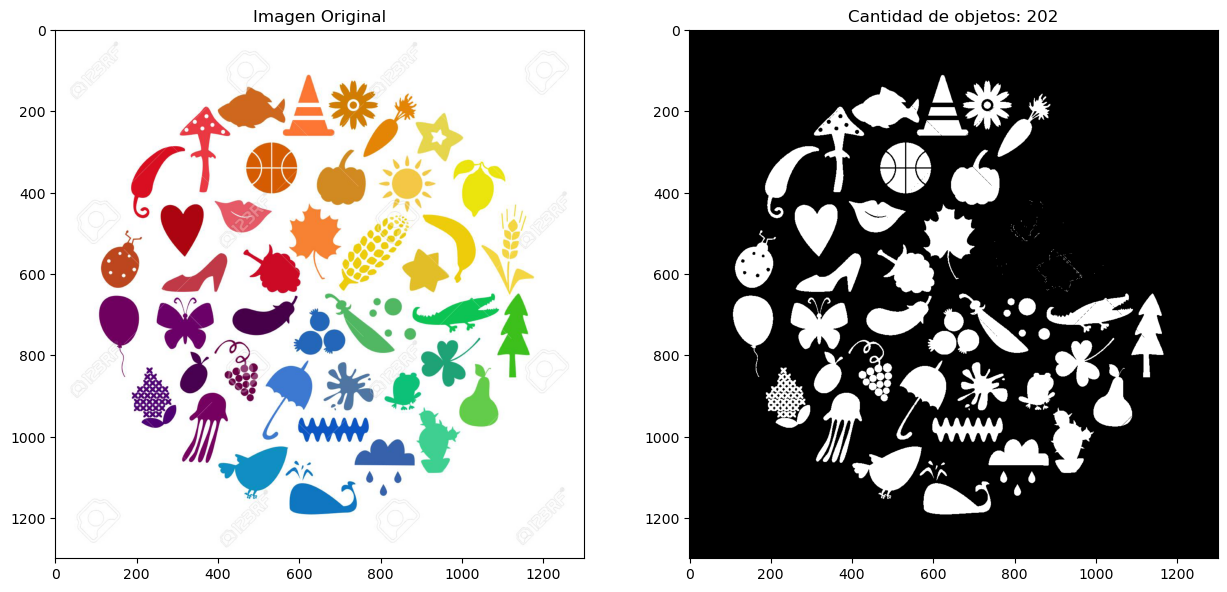

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

def contar2(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, img_bin = cv2.threshold(img_gray, 178, 255, cv2.THRESH_BINARY_INV)
    contorno = measure.label(img_bin, connectivity=2)
    num = np.max(contorno)
    return num, img_bin

imagen = cv2.imread('imgParcial/elementos.jpg')
num, img_bin = contar2(imagen)

plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
plt.title('Imagen Original')
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))

plt.subplot(1,2,2)
plt.title(f'Cantidad de objetos: {num}')
plt.imshow(img_bin, cmap='gray')
plt.show()

ejercicio 4

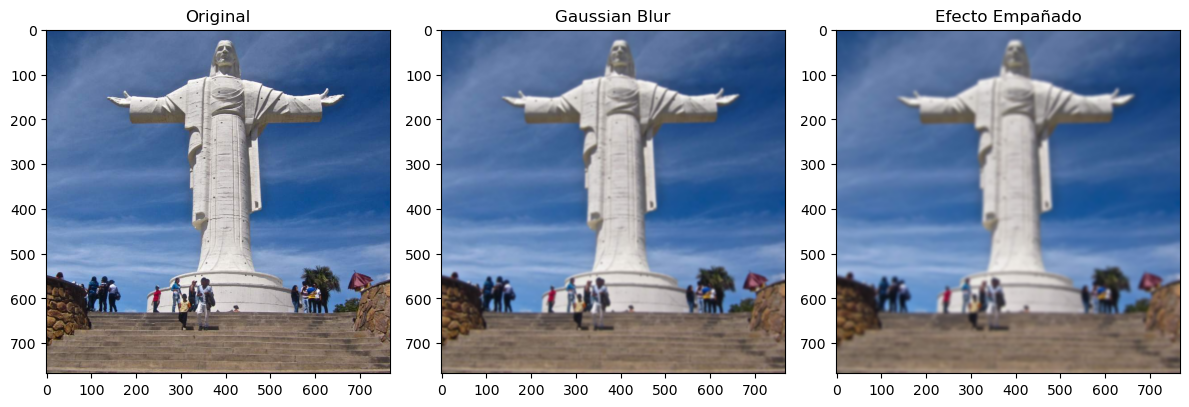

In [16]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

def convolucionMedia(imagen, tamkernel):
    kernel = np.ones((tamkernel, tamkernel), np.float32) / (tamkernel * tamkernel)
    return cv2.filter2D(imagen, -1, kernel)

imagen = cv2.imread('imgParcial/cristo.jpg')  
rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

gauss_blur = cv2.GaussianBlur(rgb, (11, 11), 0)

empañado = convolucionMedia(gauss_blur, 8)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(rgb)
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(gauss_blur)
plt.title('Gaussian Blur')

plt.subplot(1, 3, 3)
plt.imshow(empañado)
plt.title('Efecto Empañado')

plt.tight_layout()
plt.show()


Ejercicio 5

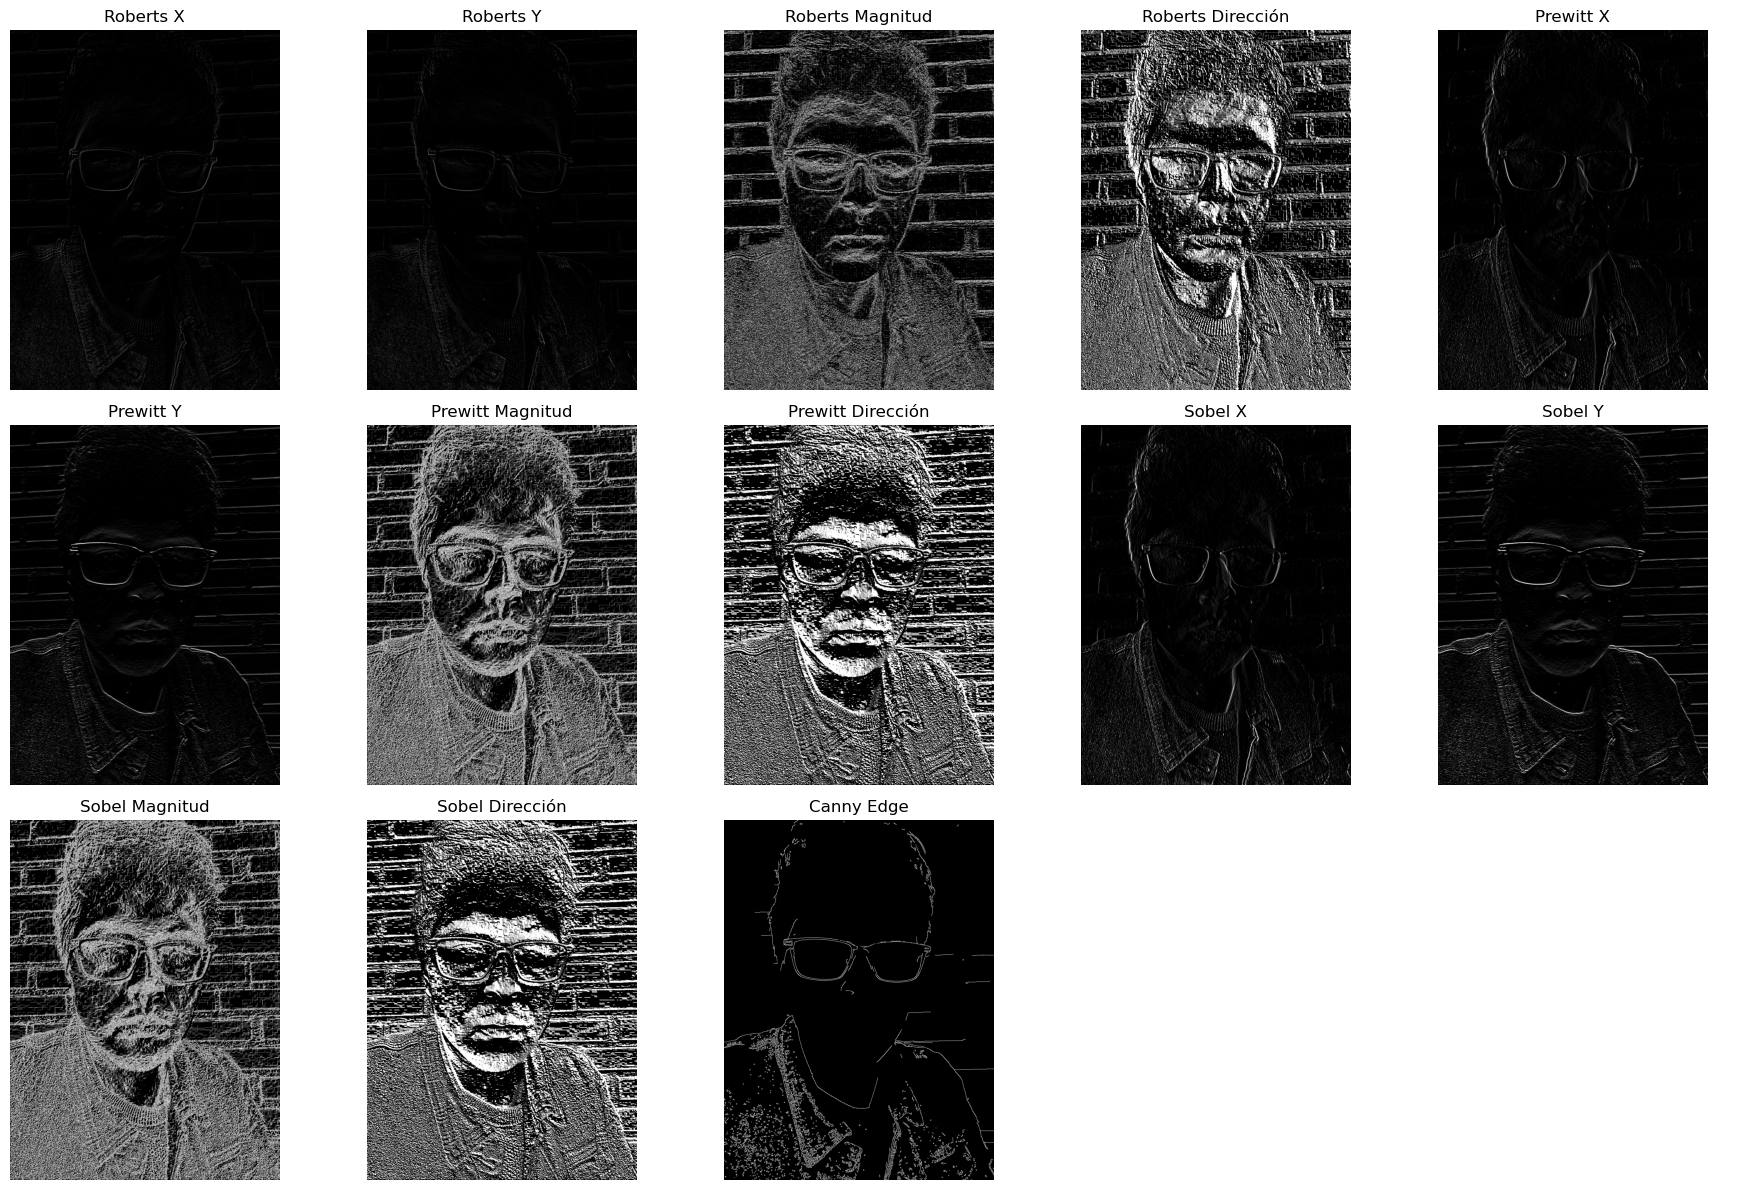

In [ ]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

img = cv2.imread('imgParcial/photo.jpg')
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

robertsx = np.array([[-1, 0], [0, 1]])
robertsy = np.array([[0, -1], [1, 0]])

img_robx = cv2.filter2D(imgGray, -1, robertsx)
img_roby = cv2.filter2D(imgGray, -1, robertsy)

rob_gMagnitud = np.sqrt(img_robx**2 + img_roby**2)
rob_gDireccion = np.arctan2(img_roby, img_robx)

prewittx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitty = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])  

img_prewitx = cv2.filter2D(imgGray, -1, prewittx)
img_prewity = cv2.filter2D(imgGray, -1, prewitty)

prew_mag = np.sqrt(img_prewitx**2 + img_prewity**2)  
prew_dir = np.arctan2(img_prewity, img_prewitx)  


sobelx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobely = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

sobx_imge = cv2.filter2D(imgGray, -1, sobelx)
soby_imge = cv2.filter2D(imgGray, -1, sobely)

sobel_grad = np.sqrt(sobx_imge**2 + soby_imge**2) 
sob_dire = np.arctan2(soby_imge, sobx_imge)  

canny = cv2.Canny(imgGray, 100, 200)

plt.figure(figsize=(18, 12)) 

plt.subplot(3, 5, 1)
plt.imshow(img_robx, cmap='gray')
plt.title('Roberts X')
plt.axis('off')

plt.subplot(3, 5, 2)
plt.imshow(img_roby, cmap='gray')
plt.title('Roberts Y')
plt.axis('off')

plt.subplot(3, 5, 3)
plt.imshow(rob_gMagnitud, cmap='gray')
plt.title('Roberts Magnitud')
plt.axis('off')

plt.subplot(3, 5, 4)
plt.imshow(rob_gDireccion, cmap='gray')
plt.title('Roberts Dirección')
plt.axis('off')

plt.subplot(3, 5, 5)
plt.imshow(img_prewitx, cmap='gray')
plt.title('Prewitt X')
plt.axis('off')

plt.subplot(3, 5, 6)
plt.imshow(img_prewity, cmap='gray')
plt.title('Prewitt Y')
plt.axis('off')

plt.subplot(3, 5, 7)
plt.imshow(prew_mag, cmap='gray')
plt.title('Prewitt Magnitud')
plt.axis('off')

plt.subplot(3, 5, 8)
plt.imshow(prew_dir, cmap='gray')
plt.title('Prewitt Dirección')
plt.axis('off')

plt.subplot(3, 5, 9)
plt.imshow(sobx_imge, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(3, 5, 10)
plt.imshow(soby_imge, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(3, 5, 11)
plt.imshow(sobel_grad, cmap='gray')
plt.title('Sobel Magnitud')
plt.axis('off')

plt.subplot(3, 5, 12)
plt.imshow(sob_dire, cmap='gray')
plt.title('Sobel Dirección')
plt.axis('off')

plt.subplot(3, 5, 13)
plt.imshow(canny, cmap='gray')
plt.title('Canny Edge')
plt.axis('off')

plt.subplot(3, 5, 14)
plt.axis('off')
plt.subplot(3, 5, 15)
plt.axis('off')

plt.tight_layout()
plt.show()

1. Roberts
Roberts X e Y: Detectan bordes en diagonal. Usan máscaras pequeñas (2x2).

Magnitud: Combina X e Y para resaltar bordes.

Dirección: Muestra el ángulo del borde detectado.

2. Prewitt
Prewitt X e Y: Detectan bordes verticales (X) y horizontales (Y).

Magnitud: Intensidad del borde.

Dirección: Orientación del borde.

3. Sobel
Sobel X e Y: Similar a Prewitt, pero más sensible al ruido. Pondera más el centro.

Magnitud: Fuerza del borde.

Dirección: Ángulo del borde.

4. Canny
Canny: Detector avanzado. Usa suavizado, gradientes y umbrales. Muy preciso.


Ejercicio 6

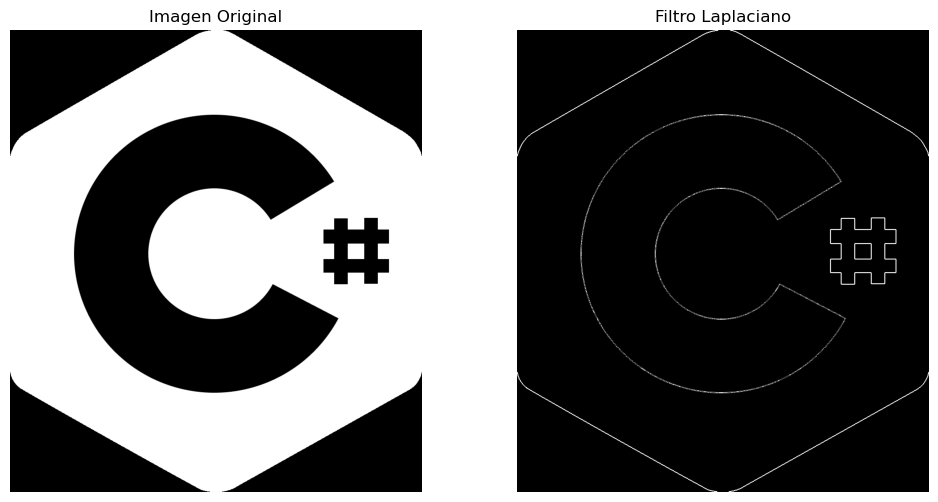

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('imgParcial/lap.png', cv2.IMREAD_GRAYSCALE)

laplacian = cv2.Laplacian(image, cv2.CV_64F)

laplacian_abs = np.uint8(np.absolute(laplacian))

plt.figure(figsize=(12, 6))

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Imagen Original'), plt.axis('off')

plt.subplot(122), plt.imshow(laplacian_abs, cmap='gray')
plt.title('Filtro Laplaciano'), plt.axis('off')

plt.show()

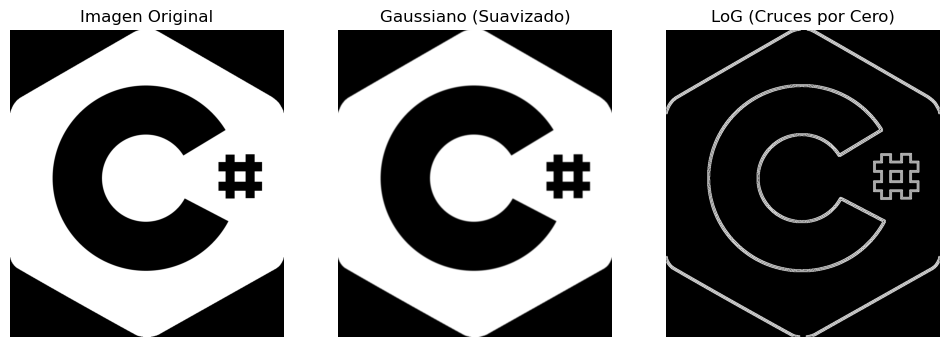

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('imgParcial/lap.png', cv2.IMREAD_GRAYSCALE)

blurred = cv2.GaussianBlur(image, (5, 5), sigmaX=1.4)

laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

zero_crossings = np.zeros_like(laplacian)
rows, cols = laplacian.shape

for i in range(1, rows - 1):
    for j in range(1, cols - 1):
       
        neighbors = [
            laplacian[i-1, j], laplacian[i+1, j],  
            laplacian[i, j-1], laplacian[i, j+1], 
            laplacian[i-1, j-1], laplacian[i-1, j+1],  
            laplacian[i+1, j-1], laplacian[i+1, j+1]
        ]
        if any(np.sign(laplacian[i, j]) != np.sign(n) for n in neighbors):
            zero_crossings[i, j] = 255

plt.figure(figsize=(12, 6))

plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Imagen Original'), plt.axis('off')

plt.subplot(132), plt.imshow(blurred, cmap='gray')
plt.title('Gaussiano (Suavizado)'), plt.axis('off')

plt.subplot(133), plt.imshow(zero_crossings, cmap='gray')
plt.title('LoG (Cruces por Cero)'), plt.axis('off')

plt.show()